## Laden der Datenvorbereitung

In [1]:
%run Preparation.ipynb


[0 1]
Alle Daten: 20560
Testdaten: 5756
Trainingsdaten: 14804


C:\Users\Jörg\AppData\Local\Temp\ipykernel_9996\3403862666.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ZeitTag"] = dateInts
C:\Users\Jörg\AppData\Local\Temp\ipykernel_9996\3403862666.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ZeitTag"] = pd.to_datetime(df2["ZeitTag"])
C:\Users\Jörg\AppData\Local\Temp\ipykernel_9996\3403862666.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop

## Trainieren des Modells

### Decision Trees

In [2]:
from sklearn import tree
plt.rcParams['figure.figsize'] = [20, 10]


clf = tree.DecisionTreeClassifier(min_samples_leaf=600, max_depth=4)
# X für die Trainingssamples
# Y für die Labels
clf = clf.fit(df_train.loc[:,["Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit"]],df_train.loc[:,["Belegt Ja/Nein"]])
# Ohne Licht
# clf = clf.fit(df_train.loc[:,["Temperatur","Feuchtigkeit","CO2","Temperatur/RelativeFeuchtigkeit"]],
# df_train.loc[:,["Belegt Ja/Nein"]])
# tree.plot_tree(clf)



### VORHERSAGEGENAUIGKEIT
prediction = clf.predict(df_test.loc[:,["Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit"]])

# Ohne Licht
# prediction = clf.predict(df_test.loc[:,["Temperatur","Feuchtigkeit","CO2","Temperatur/RelativeFeuchtigkeit"]])
accuracy = round(sklearn.metrics.accuracy_score(df_test.loc[:,["Belegt Ja/Nein"]], prediction),4)

print(f"Accuracy: {accuracy}%")



Accuracy: 0.9666%


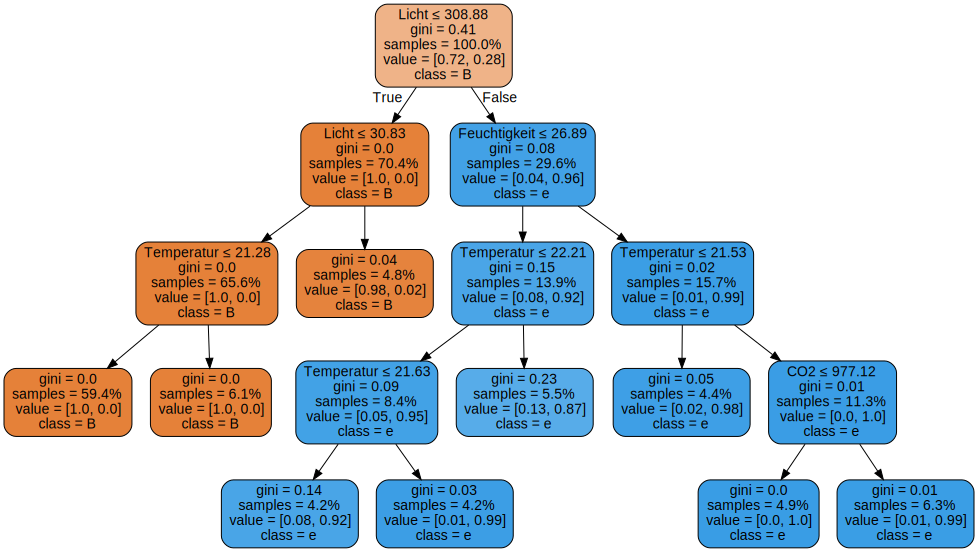

In [3]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

# Value zeigt die Wahrscheinlichkeit an des Decision Trees
# Precision die Nachkommastellen
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=["Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit"],  
                    #  feature_names=["Temperatur","Feuchtigkeit","CO2","Temperatur/RelativeFeuchtigkeit"],  
                     class_names="Belegung",  
                     filled=True, rounded=True, 
                     proportion=True, 
                     precision=2,
                     fontname="Arial",
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Random Forest

In [4]:
from sklearn import tree
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.ensemble import RandomForestRegressor
plt.rcParams['figure.figsize'] = [20, 10]

X_train = df_train.loc[:,["Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit"]]
X_test = df_test.loc[:,["Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit"]]

y_train = df_train.loc[:,["Belegt Ja/Nein"]]
y_test = df_test.loc[:,["Belegt Ja/Nein"]]


X = df.loc[:,["Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit"]]
y = df.loc[:,["Belegt Ja/Nein"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier(n_estimators=600, max_depth=4)
forest.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = forest.predict(X_test)

# View accuracy score
print(round(accuracy_score(y_test, y_pred_test),4)*100,"%")


C:\Users\Jörg\AppData\Local\Temp\ipykernel_9996\2077629400.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


99.05000000000001 %


In [5]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[3912,   40],
       [   9, 1179]], dtype=int64)

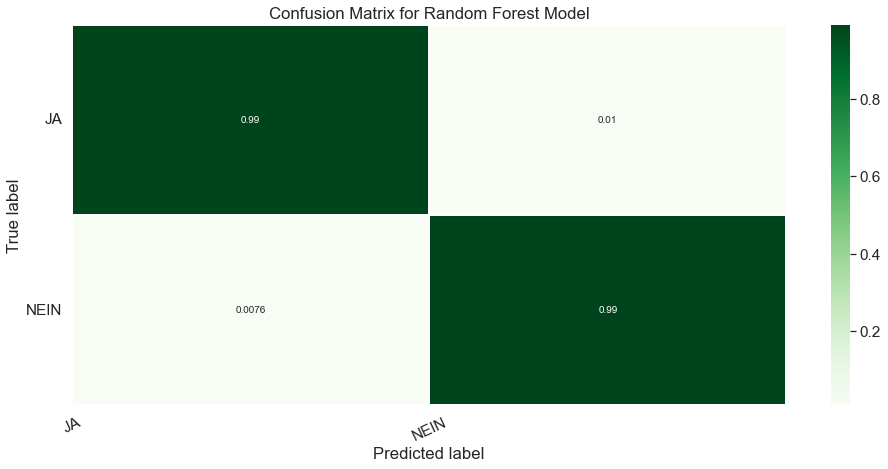

In [6]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ["JA","NEIN"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## XGBoost

In [7]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data

X_train = df_train.loc[:,["Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit"]]
X_test = df_test.loc[:,["Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit"]]

y_train = df_train.loc[:,["Belegt Ja/Nein"]]
y_test = df_test.loc[:,["Belegt Ja/Nein"]]


X = df.loc[:,["Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit"]]
y = df.loc[:,["Belegt Ja/Nein"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# fit model no training data
model = XGBClassifier()
grid = {'max_depth':6, 'n_estimators':600}
model.set_params(**grid)



model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.38%


In [8]:
# fig, ax = plt.subplots(figsize=(30, 30))
# xgb.plot_tree(model, num_trees=1, ax=ax)
# plt.show()

# Propability
# y = 0.462891251
# n = 0.419973642
# print("Yes:",round(1/(1+np.exp(-1*y)),2),"%")
# print("No:",round(1/(1+np.exp(-1*n)),2),"%")

## XGBoost nur Temperatur

In [9]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data

X_train = df_train.loc[:,["Temperatur","Feuchtigkeit","CO2","Temperatur/RelativeFeuchtigkeit"]]
X_test = df_test.loc[:,["Temperatur","Feuchtigkeit","CO2","Temperatur/RelativeFeuchtigkeit"]]

y_train = df_train.loc[:,["Belegt Ja/Nein"]]
y_test = df_test.loc[:,["Belegt Ja/Nein"]]


X = df.loc[:,["Temperatur","Feuchtigkeit","CO2","Temperatur/RelativeFeuchtigkeit"]]
y = df.loc[:,["Belegt Ja/Nein"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# fit model no training data
model = XGBClassifier()
grid = {'max_depth':4, 'n_estimators':600}
model.set_params(**grid)



model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.44%


In [10]:
# fig, ax = plt.subplots(figsize=(30, 30))
# xgb.plot_tree(model, num_trees=1, ax=ax)
# plt.show()

# # Propability
# y = -0.410690039
# n = 0.111485869
# print("Yes:",round(1/(1+np.exp(-1*y)),2),"%")
# print("No:",round(1/(1+np.exp(-1*n)),2),"%")

## XGBoost nur Licht

In [11]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data

X_train = df_train.loc[:,["CO2"]]
X_test = df_test.loc[:,["CO2"]]

y_train = df_train.loc[:,["Belegt Ja/Nein"]]
y_test = df_test.loc[:,["Belegt Ja/Nein"]]


X = df.loc[:,["CO2"]]
y = df.loc[:,["Belegt Ja/Nein"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# fit model no training data
model = XGBClassifier()
grid = {'max_depth':1, 'n_estimators':600}
model.set_params(**grid)



model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.44%
